In [70]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
df = pd.read_csv(r'D:\zhuomianshangdedawu\US_Accidents_March23_sampled_500k\US_Accidents_March23_sampled_500k.csv', encoding='ISO-8859-1')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']) / pd.Timedelta(hours=1)
df['hour_of_Accident'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.hour
df['Year_Of_Accident'] = pd.to_datetime(df['Start_Time']).dt.year
df['months_of_accident'] = df['Start_Time'].dt.month
hour_count = pd.to_datetime(df['Start_Time']).dt.hour.value_counts().sort_index().reset_index(name='Count')
hour_count.columns = ['Hour', 'Counts']

In [73]:
def analyze_accidents_by_year(df):
    """
    分析事故数据，按年份统计事故数量并绘制折线图
    
    参数:
    - df: 包含事故数据的 DataFrame，必须包含 'Year_Of_Accident' 列
    """
    # 按年份统计事故数量
    year_counts = df['Year_Of_Accident'].value_counts().sort_index().reset_index(name='Counts')
    
    # 设置列名
    year_counts.columns = ['Year_Of_Accident', 'Counts']
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    year_counts.plot(kind='line', x='Year_Of_Accident', y='Counts', marker='o', ylabel='Count')
    
    # 设置标题
    plt.title('Accidents Count by Year')
    plt.xlabel('Year of Accident')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()


def analyze_accidents_by_month(df):
 
    # 提取月份
    df['Month'] = df['Start_Time'].dt.month
    
    # 按月份统计事故数量
    month_counts = df['Month'].value_counts().sort_index().reset_index(name='Counts')
    
    # 设置列名
    month_counts.columns = ['Month', 'Counts']
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    month_counts.plot(kind='line', x='Month', y='Counts', marker='o', ylabel='Count')
    
    # 设置标题
    plt.title('Accidents Count by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()



import pandas as pd
import matplotlib.pyplot as plt

def analyze_accidents_by_hour(df):
    """
    分析事故数据，按小时统计事故数量并绘制折线图
    
    参数:
    - df: 包含事故数据的 DataFrame，必须包含 'Start_Time' 列
    """
    # 确保 'Start_Time' 列是 datetime 类型
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    
    # 提取小时
    df['Hour'] = df['Start_Time'].dt.hour
    
    # 按小时统计事故数量
    hour_counts = df['Hour'].value_counts().sort_index().reset_index(name='Counts')
    
    # 设置列名
    hour_counts.columns = ['Hour', 'Counts']
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    plt.plot(hour_counts['Hour'], hour_counts['Counts'], marker='o', linestyle='-', color='b')
    
    # 设置标题
    plt.title('Accidents Count by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    
    # 设置网格
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()


<Figure size 1000x600 with 0 Axes>

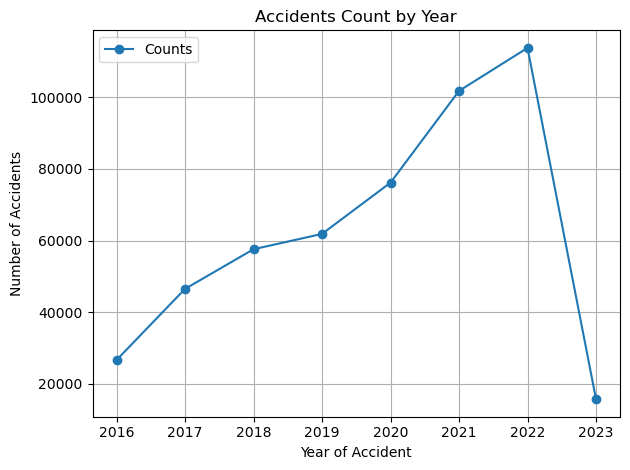

<Figure size 1000x600 with 0 Axes>

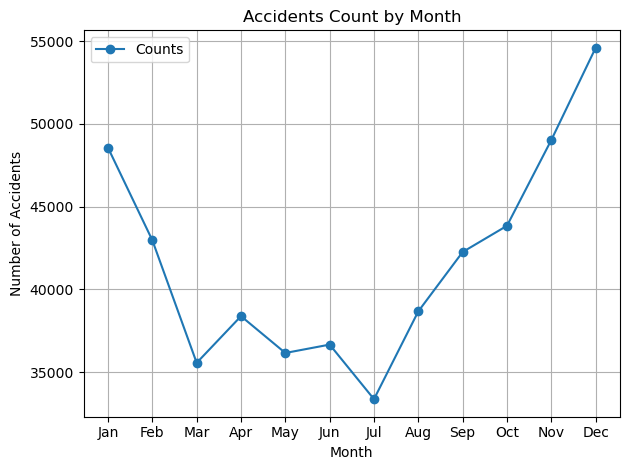

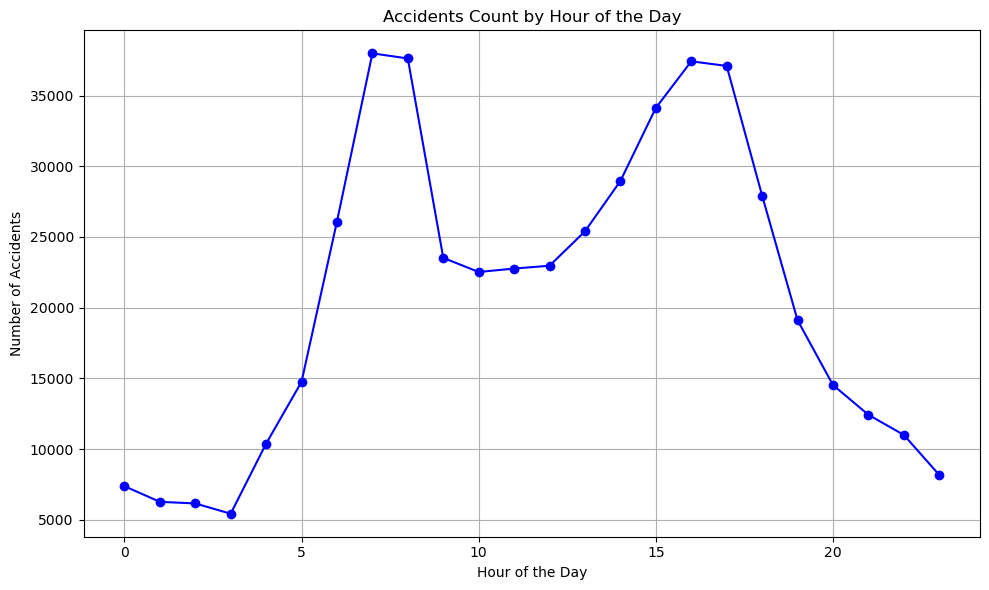

In [74]:

analyze_accidents_by_year(df)  # 按年份绘图
analyze_accidents_by_month(df)  # 按月份绘图
analyze_accidents_by_hour(df)

In [75]:
def analyze_accidents_by_time(df, interval=60):
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

    # 提取日期和小时
    df['Date'] = df['Start_Time'].dt.date
    df['Hour'] = df['Start_Time'].dt.hour

    # 统计每个日期和小时的事故数量
    accident_counts_by_hour = df.groupby(['Date', 'Hour']).size().unstack(fill_value=0)

    # 选择每隔 interval 天的日期
    dates_to_display = accident_counts_by_hour.index[::interval]

    # 创建热力图
    plt.figure(figsize=(14, 8))
    sns.heatmap(accident_counts_by_hour.loc[dates_to_display], cmap='Blues', cbar_kws={'label': 'Number of Accidents'}, annot=False, fmt='d')

    # 设置标题和标签
    plt.title('Accidents Count by Date and Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Date')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 显示图表
    plt.show()


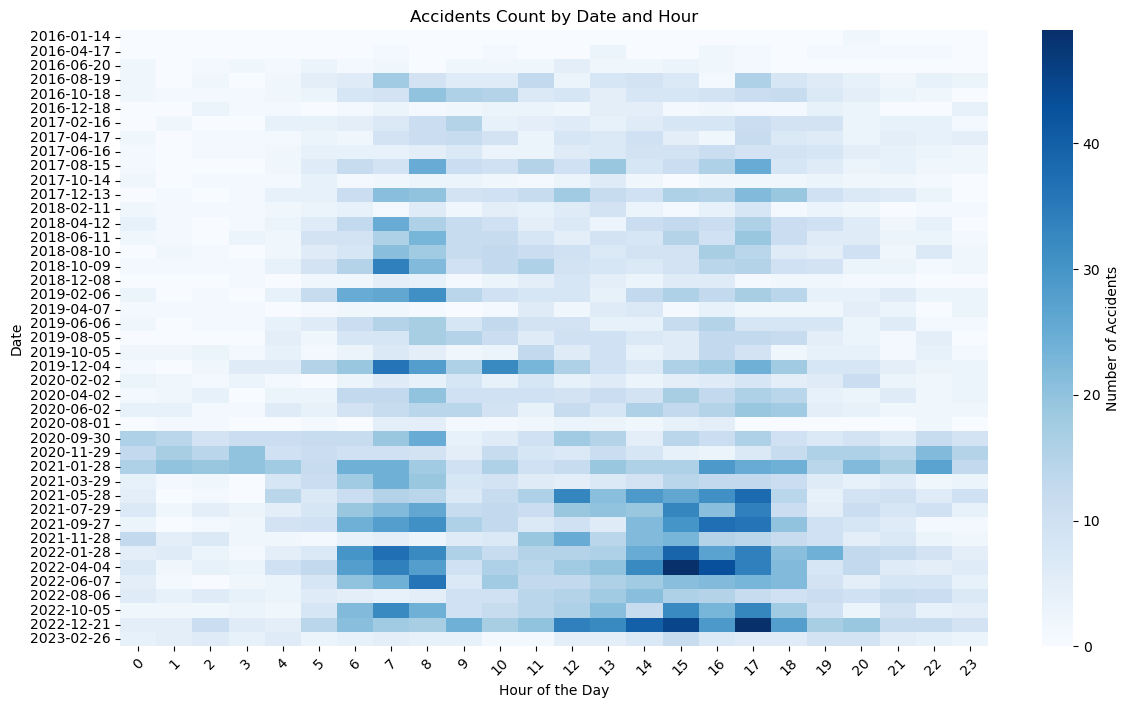

In [76]:
analyze_accidents_by_time(df, interval=60)


In [77]:


# 函数1：提取年和事故严重性
def get_severity_by_year(df):
    # 提取年份并按年份统计事故严重性的平均值
    df['Year'] = df['Start_Time'].dt.year
    return df.groupby('Year')['Severity'].mean().reset_index()

# 函数2：提取月和事故严重性
def get_severity_by_month(df):
    # 提取月份并按月份统计事故严重性的平均值
    df['Month'] = df['Start_Time'].dt.month
    return df.groupby('Month')['Severity'].mean().reset_index()

# 函数3：提取小时和事故严重性
def get_severity_by_hour(df):
    # 提取小时并按小时统计事故严重性的平均值
    df['Hour'] = df['Start_Time'].dt.hour
    return df.groupby('Hour')['Severity'].mean().reset_index()

# 函数4：绘制时间与事故严重性关系的折线图
def plot_severity_by_time(severity_by_time, time_column, title, x_labels=None):
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=time_column, y='Severity', data=severity_by_time, marker='o', color='b')
    
    # 设置标题和标签
    plt.title(title)
    plt.xlabel(time_column.capitalize())
    plt.ylabel('Average Severity')
    plt.grid(True)
    if x_labels:
        plt.xticks(range(len(x_labels)), x_labels)
    
    # 显示图表
    plt.tight_layout()
    plt.show()

# 主函数：展示年、月、小时与事故严重性的关系
def analyze_time_vs_severity(df):
    # 按年统计事故严重性
    severity_by_year = get_severity_by_year(df)
    plot_severity_by_time(severity_by_year, 'Year', 'Average Accident Severity by Year')

    # 按月统计事故严重性
    severity_by_month = get_severity_by_month(df)
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plot_severity_by_time(severity_by_month, 'Month', 'Average Accident Severity by Month', month_labels)

    # 按小时统计事故严重性
    severity_by_hour = get_severity_by_hour(df)
    plot_severity_by_time(severity_by_hour, 'Hour', 'Average Accident Severity by Hour')

# 你可以在主函数中调用analyze_time_vs_severity来进行分析


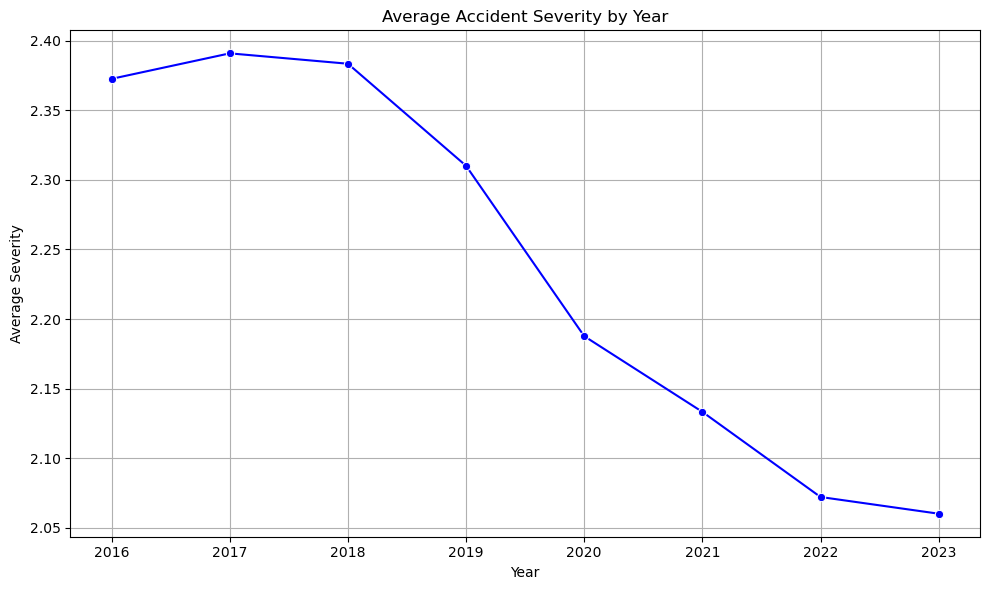

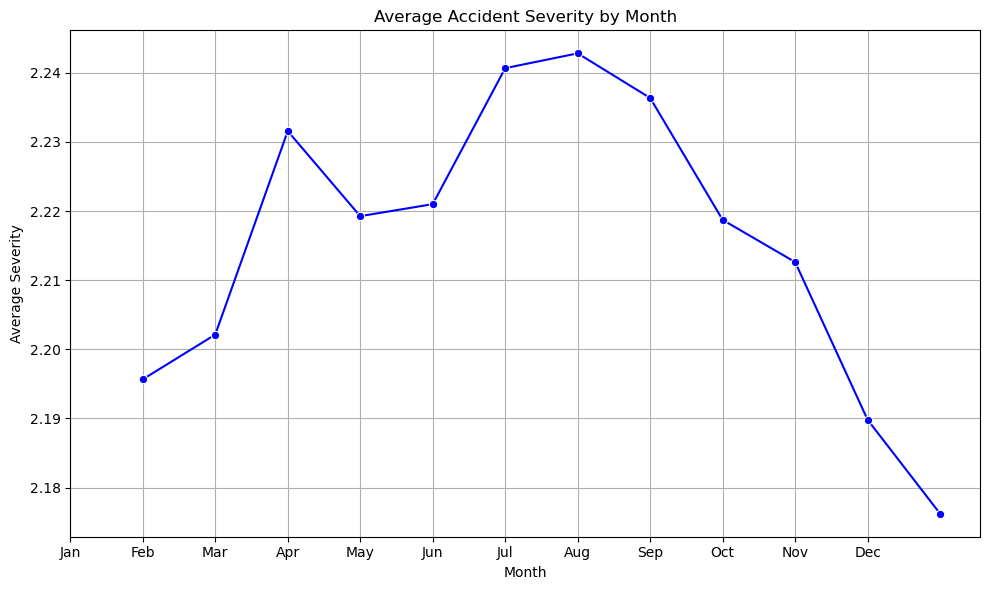

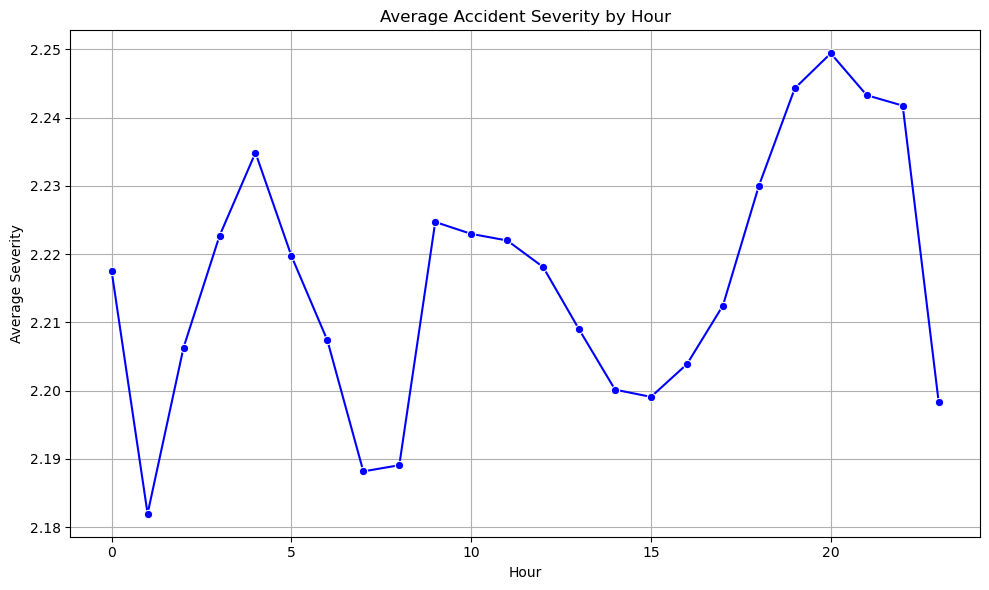

In [78]:
analyze_time_vs_severity(df)

In [79]:
def plot_correlation_matrix_with_numbers_fixed(df):
    # 提取时间维度
    df['Year'] = df['Start_Time'].dt.year
    df['Month'] = df['Start_Time'].dt.month
    df['Hour'] = df['Start_Time'].dt.hour

    # 数据清理
    df['Severity'] = df['Severity'].astype(float)
    df = df.dropna(subset=['Year', 'Month', 'Hour', 'Severity'])  # 删除缺失值
    df = df.loc[:, df.nunique() > 1]  # 移除唯一值列

    # 计算相关矩阵
    correlation_matrix = df[['Year', 'Month', 'Hour', 'Severity']].corr()

    # 打印矩阵检查
    print(correlation_matrix)

    # 绘制相关矩阵热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_matrix,  # 传递计算得到的相关矩阵
        annot=True,          # 显示数值
        cmap="coolwarm",     # 设置颜色映射
        linewidths=0.5,      # 设置格子间距
        cbar=True            # 显示颜色条
    )

    # 添加标题
    plt.title("Correlation Matrix with Numbers", fontsize=14)
    plt.tight_layout()

    # 显示图表
    plt.show()

              Year     Month      Hour  Severity
Year      1.000000 -0.163725  0.026092 -0.246604
Month    -0.163725  1.000000  0.017718 -0.012259
Hour      0.026092  0.017718  1.000000  0.014798
Severity -0.246604 -0.012259  0.014798  1.000000


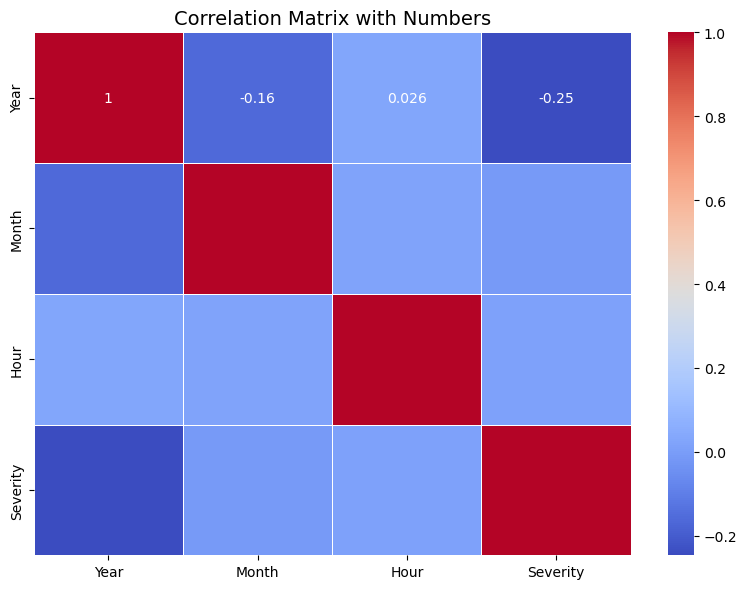

In [80]:
plot_correlation_matrix_with_numbers_fixed(df)


In [87]:

df = pd.read_csv(r'D:\zhuomianshangdedawu\US_Accidents_March23_sampled_500k\US_Accidents_March23_sampled_500k.csv', encoding='ISO-8859-1')

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# 函数：绘制经纬度与事故严重性的散点图
def plot_severity_scatter(df):
    plt.figure(figsize=(12, 8))
    
    # 使用散点图，x是经度，y是纬度，点的颜色表示事故严重性
    scatter = plt.scatter(df['Start_Lng'], df['Start_Lat'], c=df['Severity'], cmap='viridis', alpha=0.5)
    
    # 设置颜色条
    plt.colorbar(scatter, label='Severity')
    
    # 添加标题和标签
    plt.title('Accident Severity by Location (Longitude and Latitude)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    plt.tight_layout()
    plt.show()

# 主函数：展示经纬度与事故严重性的散点图
def analyze_location_vs_severity(df):
    # 绘制散点图
    plot_severity_scatter(df)


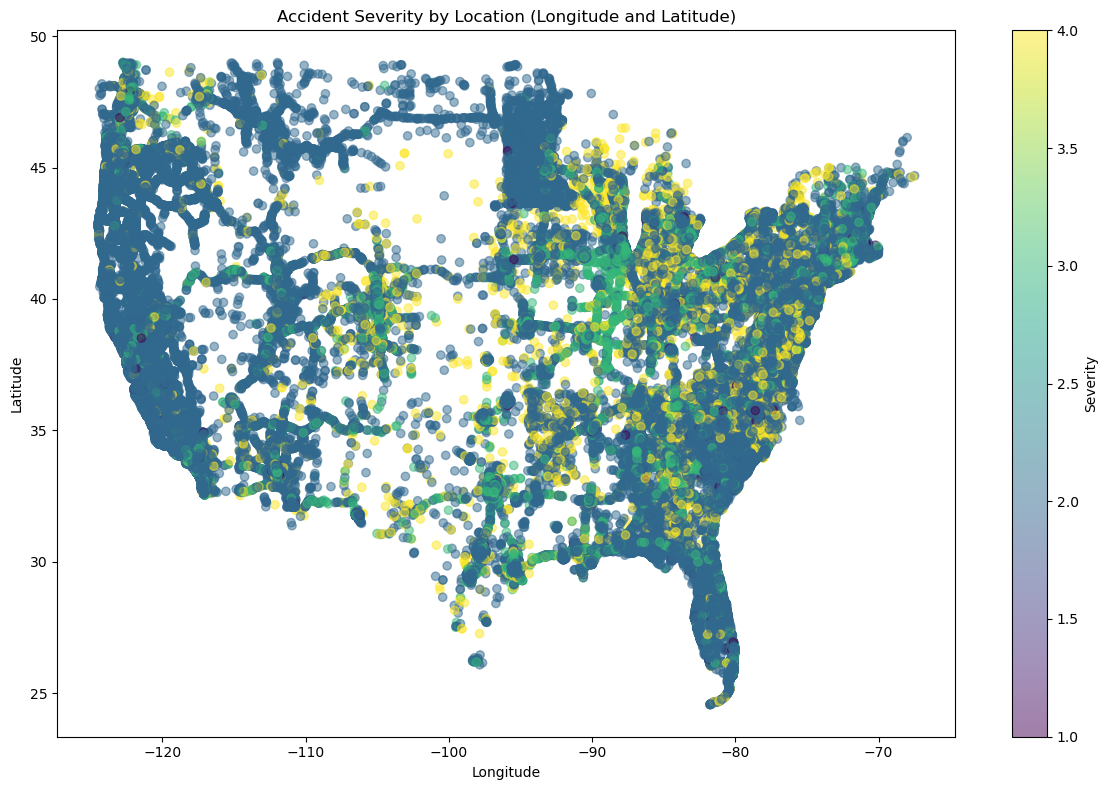

In [89]:
analyze_location_vs_severity(df)

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 假设 df 是你的数据框，选择相关的特征
df = df[['Start_Lng', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
         'Visibility(mi)', 'Wind_Direction', 'hour_of_Accident', 'months_of_accident', 'Year_Of_Accident', 'Severity']] 

# 处理缺失值（如果有）
df = df.dropna()

# 对 Wind_Direction 进行 Label Encoding
le = LabelEncoder()
df['Wind_Direction'] = le.fit_transform(df['Wind_Direction'])

# 特征和目标变量
X = df[['Start_Lng', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
        'Visibility(mi)', 'Wind_Direction', 'hour_of_Accident', 'months_of_accident', 'Year_Of_Accident']]
y = df['Severity']  # 假设这是分类目标变量




In [132]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用逻辑回归模型
model = LogisticRegression(max_iter=1000)  # 增加 max_iter 以确保收敛
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)

# 输出结果
print(f'Accuracy: {accuracy}')

Accuracy: 0.7961892749697602


D:\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 假设 df 是你的数据框，选择相关的特征
df = df[['Start_Lng', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
         'Visibility(mi)', 'Wind_Direction', 'hour_of_Accident', 'months_of_accident', 
         'Year_Of_Accident', 'Severity']]

# 处理缺失值（如果有）
df = df.dropna()

# 对 Wind_Direction 进行 Label Encoding
le = LabelEncoder()
df['Wind_Direction'] = le.fit_transform(df['Wind_Direction'])

# 定义特征和目标变量
X = df[['Start_Lng', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
        'Visibility(mi)', 'Wind_Direction', 'hour_of_Accident', 'months_of_accident', 
        'Year_Of_Accident']]
y = df['Severity']


In [117]:
# 拆分数据为训练集和测试集（80%训练集，20%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 使用随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [123]:
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

print(f"模型准确率: {accuracy:.4f}")


模型准确率: 0.8248
